yt : [INFO     ] 2024-03-18 11:40:15,540 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:15,540 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:15,541 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:15,542 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:16,005 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:16,006 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:16,006 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:16,007 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


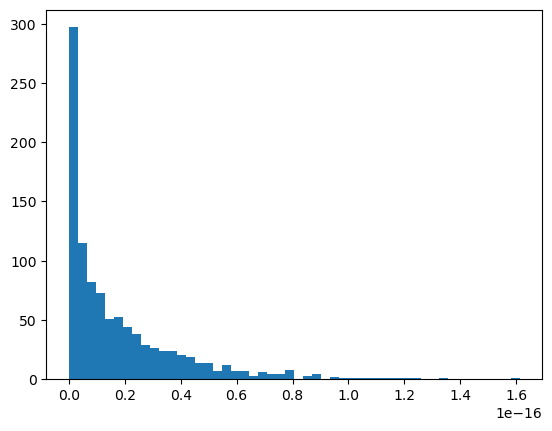

In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt


sigmaarr=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]
sigmaspec=np.zeros((20,50))

ds = yt.load('warpx/diags/diag1000000.old.9306200(0.5initial)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx\diags\diag1001270.old.9658600(0.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1

sigmaspec[0]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:16,748 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:16,749 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:16,749 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:16,750 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:17,238 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:17,238 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:17,239 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:17,239 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


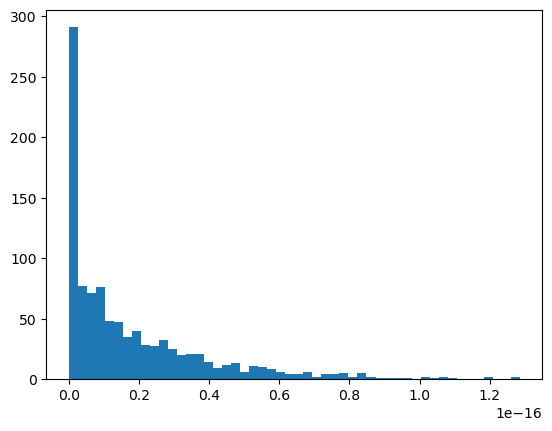

In [2]:
ds = yt.load('warpx/diags/diag1000000.old.8161300(1)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(1)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)




counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[1]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:17,803 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:17,804 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:17,804 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:17,805 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:18,291 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:18,292 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:18,292 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:18,293 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


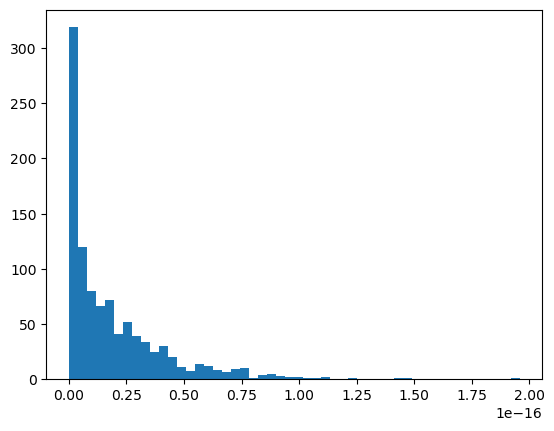

In [3]:
ds = yt.load('warpx/diags/diag1000000.old.8735800(1.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(1.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)


counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[2]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:18,859 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:18,860 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:18,860 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:18,861 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:19,272 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:19,273 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:19,273 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:19,274 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


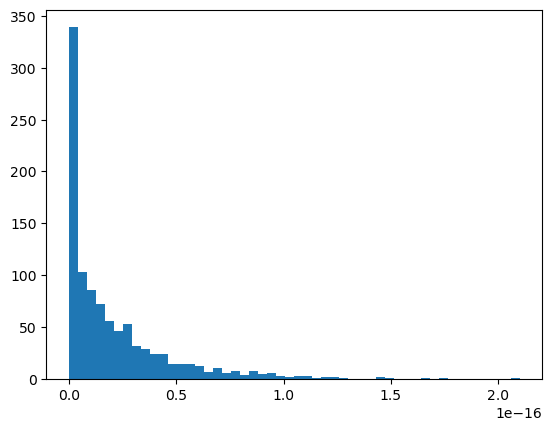

In [4]:
ds = yt.load('warpx/diags/diag1000000.old.1846300(2)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(2)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[3]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:19,917 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:19,918 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:19,918 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:19,919 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:20,320 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:20,320 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:20,321 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:20,322 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


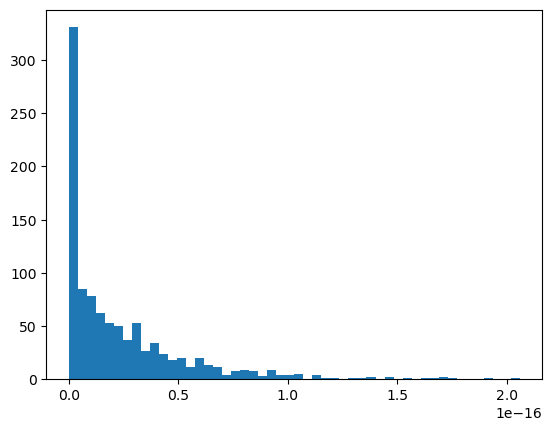

In [5]:
ds = yt.load('warpx/diags/diag1000000.old.9453000(2.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(2.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)

counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[4]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:20,978 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:20,979 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:20,979 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:20,980 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:21,386 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:21,386 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:21,387 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:21,387 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


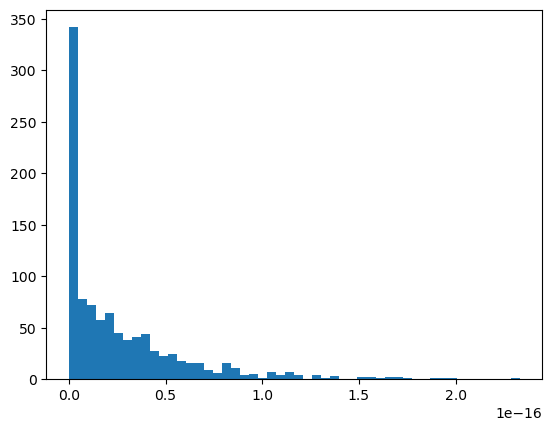

In [6]:
ds = yt.load('warpx/diags/diag1000000.old.5074700(3)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(3)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[5]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:21,952 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:21,953 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:21,953 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:21,954 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:22,451 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:22,451 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:22,452 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:22,452 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


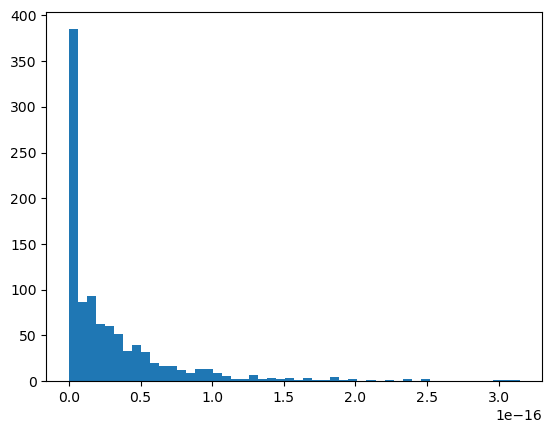

In [7]:
ds = yt.load('warpx/diags/diag1000000.old.7967000(3.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(3.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[6]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:23,022 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:23,023 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:23,023 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:23,024 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:23,438 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:23,439 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:23,439 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:23,440 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


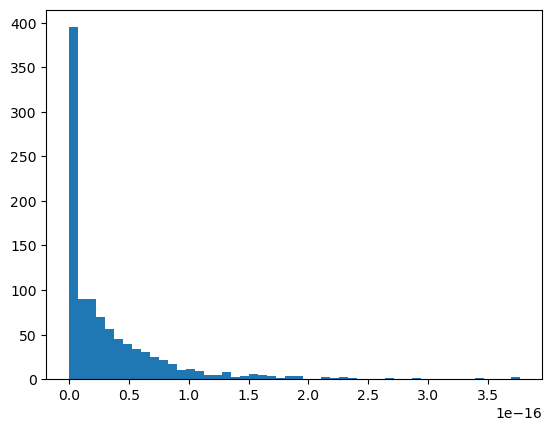

In [8]:
ds = yt.load('warpx/diags/diag1000000(4)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(4)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)




counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1

sigmaspec[7]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:24,111 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:24,112 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:24,112 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:24,113 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:24,518 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:24,518 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:24,519 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:24,519 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


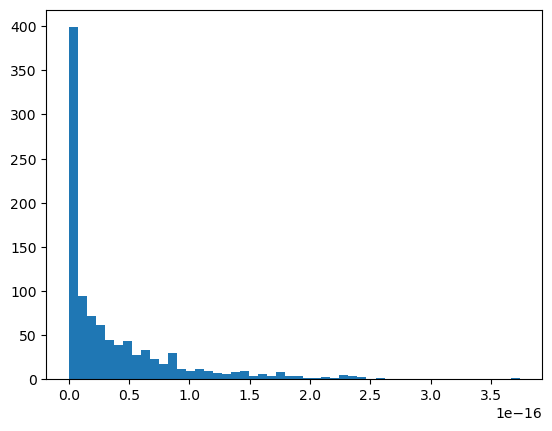

In [9]:
ds = yt.load('warpx/diags/diag1000000.old.80456009(4.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(4.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)





counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[8]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:25,102 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:25,103 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:25,103 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:25,104 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:25,597 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:25,597 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:25,597 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:25,598 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


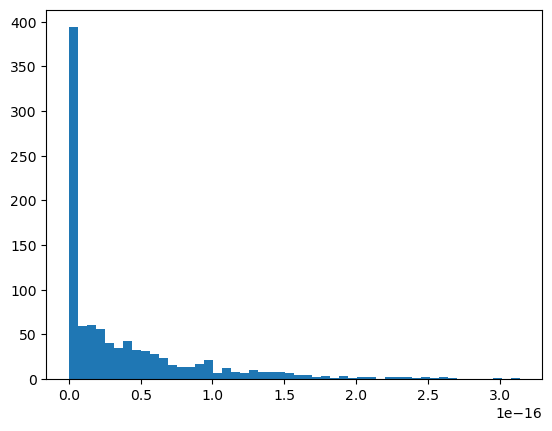

In [10]:
ds = yt.load('warpx/diags/diag1000000(5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)




counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[9]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:26,165 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:26,166 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:26,166 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:26,167 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:26,660 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:26,661 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:26,661 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:26,662 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


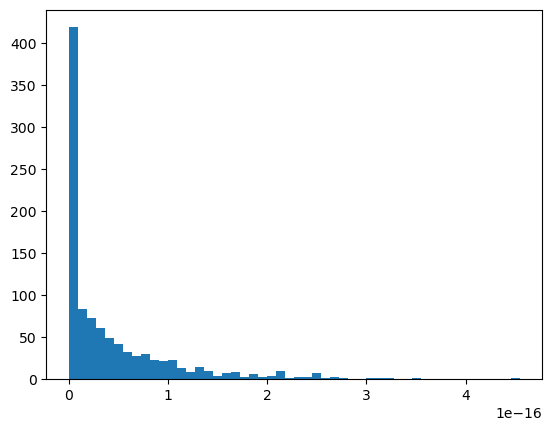

In [11]:
ds = yt.load('warpx/diags/diag1000000(5.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(5.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)





counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[10]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:27,221 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:27,221 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:27,222 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:27,222 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:27,642 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:27,643 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:27,643 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:27,644 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


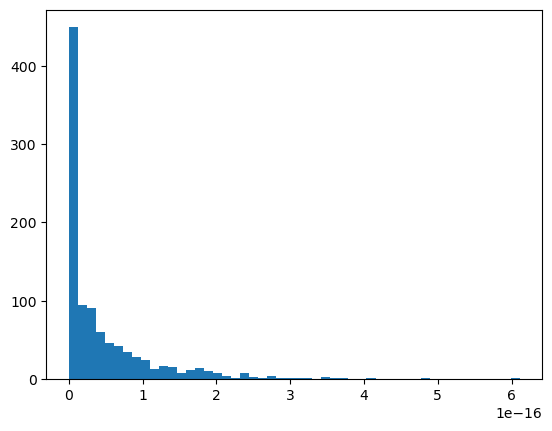

In [12]:
ds = yt.load('warpx/diags/diag1000000(6)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(6)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)





counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[11]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:28,287 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:28,288 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:28,288 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:28,289 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:28,697 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:28,698 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:28,698 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:28,699 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


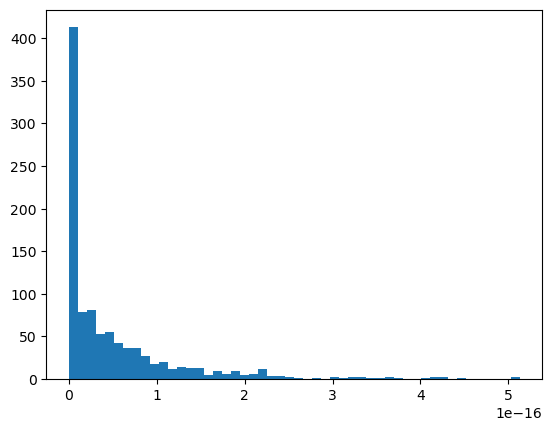

In [13]:
ds = yt.load('warpx/diags/diag1000000(6.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(6.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)

counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[12]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:29,360 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:29,361 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:29,361 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:29,362 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:29,766 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:29,767 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:29,767 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:29,768 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


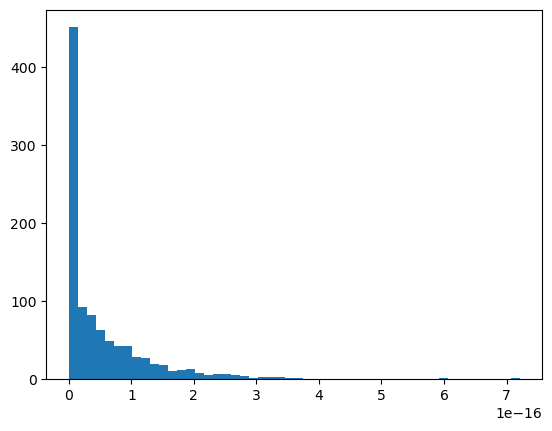

In [14]:
ds = yt.load('warpx/diags/diag1000000(7)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag10012707(2)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)



counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[13]=counts

yt : [INFO     ] 2024-03-18 11:40:30,329 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:30,330 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:30,330 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:30,331 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:30,829 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:30,829 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:30,830 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:30,830 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


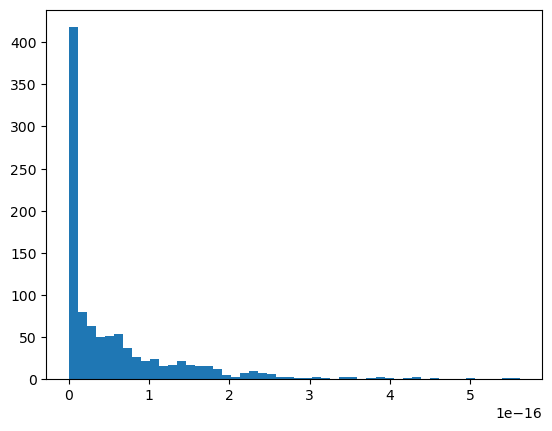

In [15]:
ds = yt.load('warpx/diags/diag1000000(7.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(7.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[14]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:31,394 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:31,394 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:31,395 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:31,396 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:31,898 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:31,898 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:31,899 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:31,900 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


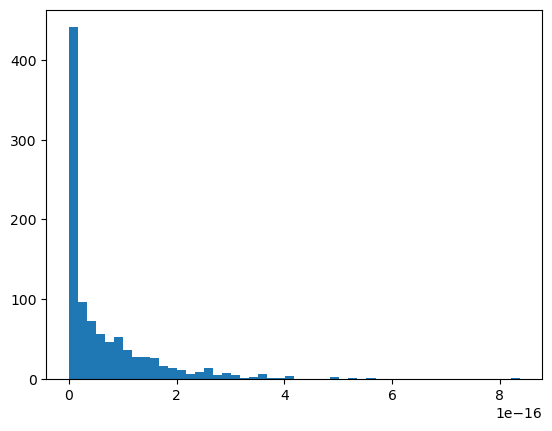

In [16]:
ds = yt.load('warpx/diags/diag1000000(8)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag10012709(8)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[15]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:32,467 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:32,467 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:32,468 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:32,469 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:32,891 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:32,891 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:32,892 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:32,892 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


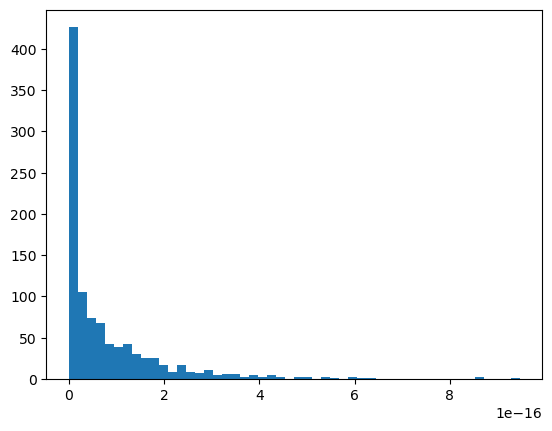

In [17]:
ds = yt.load('warpx/diags/diag1000000(8.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(8.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[16]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:33,589 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:33,590 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:33,590 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:33,591 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:33,992 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:33,993 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:33,993 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:33,994 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


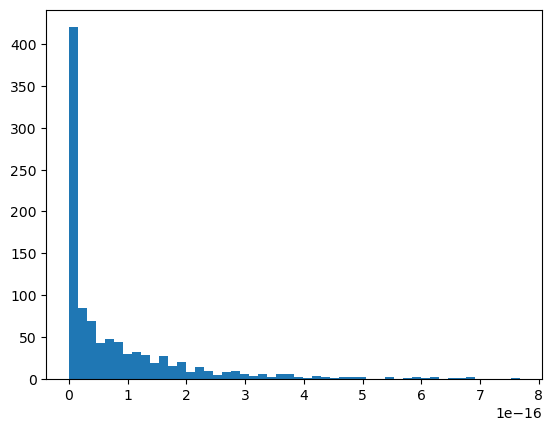

In [18]:
ds = yt.load('warpx/diags/diag1000000(9)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(9)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[17]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:34,569 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:34,570 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:34,570 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:34,571 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:35,065 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:35,066 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:35,066 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:35,067 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


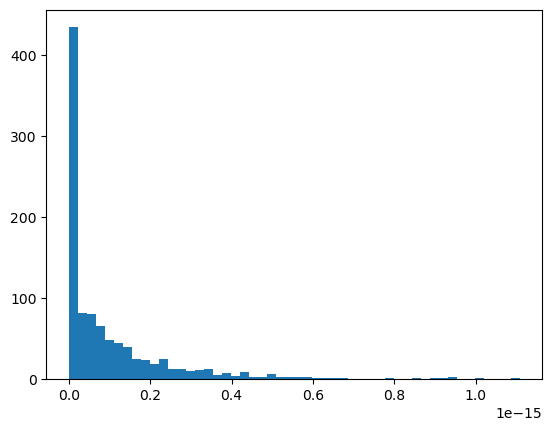

In [19]:
ds = yt.load('warpx/diags/diag1000000(9.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(9.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[18]=np.array(counts)

yt : [INFO     ] 2024-03-18 11:40:35,618 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-18 11:40:35,619 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:35,619 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-18 11:40:35,620 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-18 11:40:36,030 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-18 11:40:36,030 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-18 11:40:36,031 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-18 11:40:36,031 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


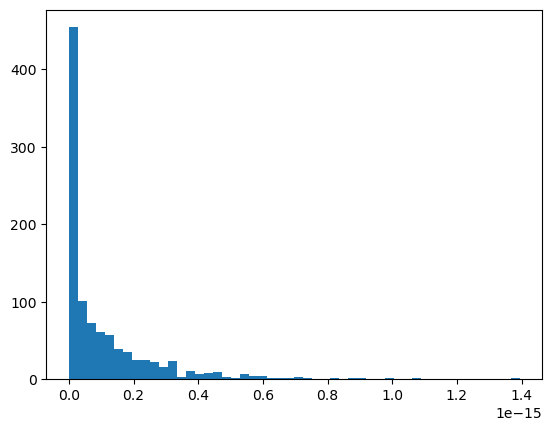

In [20]:
ds = yt.load('warpx/diags/diag1000000(10)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(10)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[19]=np.array(counts)

sigmaspecsave=sigmaspec

--- 0.3700730800628662 seconds ---
[3.5 3.5 0.5 9.  1.  7.5 5.5 1.5 6.5 3.  9.  3.  4.  4.  0.5 7.  0.5 5.
 7.5 9.  2.5 8.5 5.  5.5 8.  5.5 4.5 6.  4.  8.  3.  6.5 8.5 7.5 6.  0.5
 0.5 7.5 0.5 1.5]
[3.5 3.5 0.5 9.  1.  7.5 5.5 1.5 6.5 3.  9.  3.  4.  4.  0.5 7.  0.5 5.
 7.5 9.  2.5 8.5 5.  5.5 8.  5.5 4.5 6.  4.  8.  3.  6.5 8.5 7.5 6.  0.5
 0.5 7.5 0.5 1.5]


<function matplotlib.pyplot.show(close=None, block=None)>

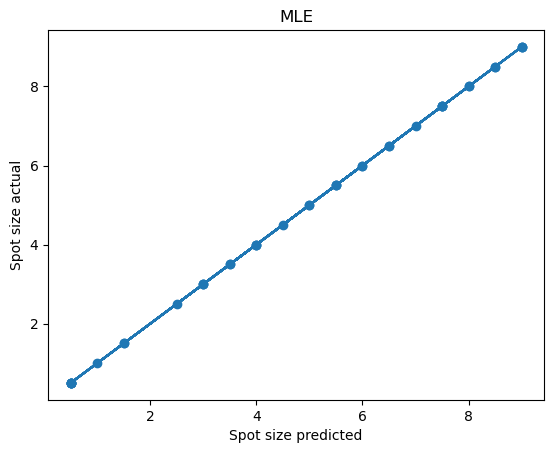

In [28]:
#MlE only
import numpy as np 
import matplotlib.pyplot as plt
import time
start_time = time.time()
sigmaspec=sigmaspecsave

                                                                                                                                                                                                                                                                                                              
                                                                                                                                                                                                                                                                                                         
sigmaarr=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]

maxlikef=np.ones(len(sigmaspec))

yspect=np.zeros((40,50))
likelihoodf=np.ones(len(yspect))
testsigma=np.zeros(19)
sigmaactual=np.ones(len(yspect))
for i in range(len(yspect)):
     randomnum=np.random.randint(0,19)
     

     yspect[i]=sigmaspec[randomnum]
     sigmaactual[i]=sigmaarr[randomnum]

likelihoodfunction=np.zeros((40,20))   

sigma2f=np.ones(len(yspect))


likelihoodf=np.zeros(len(sigmaspec))
reducedarr=np.zeros((len(yspect),5))



for k in range(0,len(yspect)):
    
    yspec=yspect[k]
    yprob=np.ones(len(yspec))
    sigmaf=np.ones(len(sigmaspec))
   
    ysum=0
    for v in range(0,len(yspec)):
        
        ysum=ysum+yspec[v]
    
    for v in range(0,len(yspec)):
             yprob[v]=yspec[v]/ysum                
    

    for i in range(0,(len(sigmaspec))):
        sigma1spec=sigmaspec[i]
        xspec=sigma1spec  
        sigmaf[i]=sigmaarr[i]
    
        xprob=np.ones(len(xspec))
        for j in range(0,(len(xspec))):
            xprob[j]=xspec[j]/(np.array(sum(xspec), dtype=int))
        #print('x',xprob)
        #print('y',yprob)

               
        likelihood=0
        
                       
        for u in range (0,len(xprob)):
                   
                        
                         likelihood=likelihood+yprob[u]*np.log(xprob[u])
              
            
        likelihoodf[i]=likelihood
    
        
       
    

              
        
            #sigma2f[k]=np.array(yspect[p][0], dtype=int)
    
    maxlike=max(likelihoodf)
    #print(likelihoodf)
    #print(maxlike)
    likelihoodfunction[k]=(np.array(likelihoodf  , dtype=float))  
    for h in range(len(likelihoodf)):
      
        if likelihoodf[h]==maxlike:
            #print(h)
            #print(sigmaarr[h])
            sigma2f[k]=np.array(sigmaarr[h], dtype=float)
            if h<1:
              reducedarr[k]=[0,0,likelihoodf[h],likelihoodf[h+1],likelihoodf[h+2]]
            if h==len(likelihoodf)-1:
                
                reducedarr[k]=[likelihoodf[h-2],likelihoodf[h-1],likelihoodf[h],0,0]

            if h<2:
                reducedarr[k]=[0,likelihoodf[h-1],likelihoodf[h],likelihoodf[h+1],likelihoodf[h+2]]
            if h==len(likelihoodf)-2:
                print(h)
                
                reducedarr[k]=[likelihoodf[h-2],likelihoodf[h-1],likelihoodf[h],likelihoodf[h+1],0]
                
            if h in range(2,len(likelihoodf)-2):
                reducedarr[k]=[likelihoodf[h-2],likelihoodf[h-1],likelihoodf[h],likelihoodf[h+1],likelihoodf[h+2]]
                
                
              
            
print("--- %s seconds ---" % (time.time() - start_time))        
            
#print(reducedarr)    
            
yspect1=yspect            
reducedarr1=reducedarr
likelihoodfunction1=likelihoodfunction
sigmaactual1=sigmaactual
print(sigma2f)
print(sigmaactual)
plt.figure
plt.title("MLE")
plt.xlabel("Spot size predicted")
plt.ylabel("Spot size actual")
plt.scatter(sigma2f,sigmaactual)
plt.plot(sigmaactual,sigmaactual)
plt.show

18
[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10. ]
[3.5 0.5 8.5 3.  6.  6.5 5.  3.5 8.  0.5 2.  6.  6.  5.5 6.5 0.5 0.5 0.5
 6.5 5.  9.5 0.5 2.5 0.5 6.  9.  8.5 6.  4.  2.  6.  5.  6.5 0.5 8.  5.5
 1.5 7.  8.5 4. ]


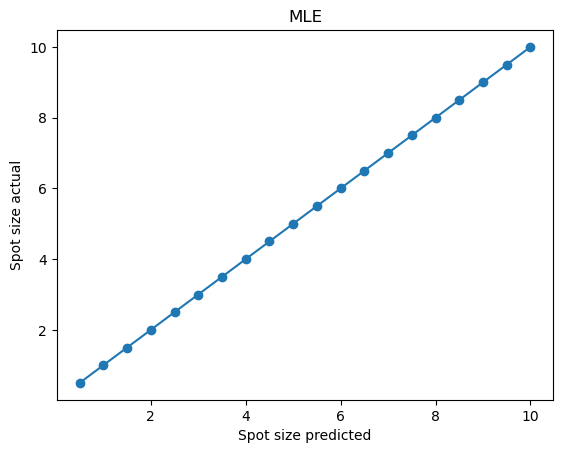

In [30]:
#MLE setup for ml training
import numpy as np 
import matplotlib.pyplot as plt
import time
start_time = time.time()

sigmaspec=sigmaspecsave

                                                                                                                                                                                                                                                                                                              
sigmaarr=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]                                                                                                                                                                                                                                                                                                    

maxlikef=np.ones(len(sigmaspec))
yspect=np.zeros((20,50))
yspect2=np.zeros((40,50))
likelihoodf=np.ones(len(yspect))
testsigma=np.zeros(19)

sigmaactual=np.ones(len(yspect2))
for i in range(len(yspect2)):
     randomnum=np.random.randint(0,19)
     

     yspect2[i]=sigmaspec[randomnum]
     sigmaactual[i]=sigmaarr[randomnum]
yspect=sigmaspec


likelihoodfunction=np.zeros((20,20))   

sigma2f=np.ones(len(yspect))



likelihoodf=np.zeros(len(sigmaspec))
reducedarr=np.zeros((len(yspect),5))



for k in range(0,len(yspect)):
    
    yspec=yspect[k]
    yprob=np.ones(len(yspec))
    sigmaf=np.ones(len(sigmaspec))
   
    ysum=0
    for v in range(0,len(yspec)):
        
        ysum=ysum+yspec[v]
    
    for v in range(0,len(yspec)):
             yprob[v]=yspec[v]/ysum                
    

    for i in range(0,(len(sigmaspec))):
        sigma1spec=sigmaspec[i]
        xspec=sigma1spec  
        sigmaf[i]=sigmaarr[i]
    
        xprob=np.ones(len(xspec))
        for j in range(0,(len(xspec))):
            xprob[j]=xspec[j]/(np.array(sum(xspec), dtype=int))
        #print('x',xprob)
        #print('y',yprob)

               
        likelihood=0
        
                       
        for u in range (0,len(xprob)):
                   
                        
                         likelihood=likelihood+yprob[u]*np.log(xprob[u])
              
            
        likelihoodf[i]=likelihood
    
        
       
    

              
        
            #sigma2f[k]=np.array(yspect[p][0], dtype=int)
    
    maxlike=max(likelihoodf)
    #print(likelihoodf)
    #print(maxlike)
    likelihoodfunction[k]=(np.array(likelihoodf  , dtype=float))  
    for h in range(len(likelihoodf)):
      
        if likelihoodf[h]==maxlike:
            #print(h)
            #print(sigmaarr[h])
            sigma2f[k]=np.array(sigmaarr[h], dtype=float)
            if h<1:
              reducedarr[k]=[0,0,likelihoodf[h],likelihoodf[h+1],likelihoodf[h+2]]
            if h==len(likelihoodf)-1:
                
                reducedarr[k]=[likelihoodf[h-2],likelihoodf[h-1],likelihoodf[h],0,0]

            if h<2:
                reducedarr[k]=[0,likelihoodf[h-1],likelihoodf[h],likelihoodf[h+1],likelihoodf[h+2]]
            if h==len(likelihoodf)-2:
                print(h)
                
                reducedarr[k]=[likelihoodf[h-2],likelihoodf[h-1],likelihoodf[h],likelihoodf[h+1],0]
                
            if h in range(2,len(likelihoodf)-2):
                reducedarr[k]=[likelihoodf[h-2],likelihoodf[h-1],likelihoodf[h],likelihoodf[h+1],likelihoodf[h+2]]
                
                
                
            
                
            
#print(reducedarr)    
            
            

print(sigma2f)
print(sigmaactual)
plt.figure
plt.title("MLE")
plt.xlabel("Spot size predicted")
plt.ylabel("Spot size actual")
plt.scatter(sigma2f,sigmaarr)
plt.plot(sigmaarr,sigmaarr)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
40
20
[ 6  6  0 17  1 14 10  2 12  5 17  5  7  7  0 13  0  9 14 17  4 16  9 10
 15 10  8 11  7 15  5 12 16 14 11  0  0 14  0  2]
[3.5 3.5 0.5 9.  1.  7.5 5.5 1.5 6.5 3.  9.  3.  4.  4.  0.5 7.  0.5 5.
 7.5 9.  2.5 8.5 5.  5.5 8.  5.5 4.5 6.  4.  8.  3.  6.5 8.5 7.5 6.  0.5
 0.5 7.5 0.5 1.5]
[3.5 3.5 0.5 9.  1.  7.5 5.5 1.5 6.5 3.  9.  3.  4.  4.  0.5 7.  0.5 5.
 7.5 9.  2.5 8.5 5.  5.5 8.  5.5 4.5 6.  4.  8.  3.  6.5 8.5 7.5 6.  0.5
 0.5 7.5 0.5 1.5]
0.0
--- 0.8041870594024658 seconds ---


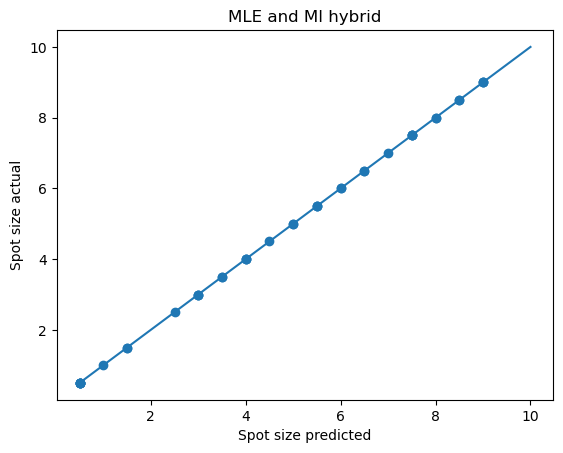

In [37]:
#hybrid ML and MLE
import time
start_time = time.time()

from sklearn.neural_network import MLPClassifier
#sigmapos=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
from sklearn.model_selection import train_test_split

sigmapos=np.zeros(len(sigmaarr))
n=0
for i in range(len(sigmaarr)):
    
    sigmapos[i]=n
    n=n+1
sigmapos=sigmapos.astype('int')
print(sigmapos)
testdata=yspect.astype('int')
xdataarr=reducedarr

sigmaarr=np.array(sigmaarr)
mlp = MLPClassifier(solver = 'adam', activation = 'tanh', alpha = 1e-5, hidden_layer_sizes = (500, 200), 
                    random_state = 1, max_iter = 10000)
mlp.fit(reducedarr,sigmapos)
predict=mlp.predict(reducedarr1)
sigmapred=np.zeros(len(predict))
sigmapred=np.zeros(len(predict))

sigmapred=np.zeros(len(predict))
print(len(sigmapred))
print(len(sigmaarr))
print(predict)
for i in range(len(sigmapred)):
    sigmapred[i]=sigmaarr[predict[i]]
print(sigmapred)
print(sigmaactual1)
meansquarederror=(sum(sigmaactual1-sigmapred)**2)/len(sigmaactual1)
print(meansquarederror)
print("--- %s seconds ---" % (time.time() - start_time))

plt.figure
plt.title("MLE and Ml hybrid")
plt.xlabel("Spot size predicted")
plt.ylabel("Spot size actual")
plt.scatter(sigmapred,sigmaactual1)
plt.plot(sigmaarr,sigmaarr)
plt.show()

 

In [35]:
#ML only
import time
start_time = time.time()
from sklearn.neural_network import MLPClassifier
sigmapos=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
from sklearn.model_selection import train_test_split

sigmapos=np.zeros(len(sigmaarr))

for i in range(len(sigmaarr)):
    
    sigmapos[i]=(sigmaarr[i]*2)-1
sigmapos=sigmapos.astype('int')
print(sigmapos)
testdata=yspect.astype('int')
xdataarr=reducedarr

sigmaarr=np.array(sigmaarr)
mlp = MLPClassifier(solver = 'adam', activation = 'tanh', alpha = 1e-5, hidden_layer_sizes = (50, 50), 
                    random_state = 1, max_iter = 10000)
mlp.fit(sigmaspec,sigmapos)
predict=mlp.predict(yspect1)
sigmapred=np.zeros(len(predict))
for i in range(len(sigmapred)):
    sigmapred[i]=sigmaarr[predict[i]]
print(sigmapred)
print(sigmaactual1)
meansquarederror=(sum(sigmaactual1-sigmapred)**2)/len(sigmaactual1)
print(meansquarederror)
print("--- %s seconds ---" % (time.time() - start_time))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[3.5 3.5 0.5 9.  1.  7.5 5.5 1.5 6.5 3.  9.  3.  4.  4.  0.5 7.  0.5 5.
 7.5 9.  2.5 8.5 5.  5.5 8.  5.5 4.5 6.  4.  8.  3.  6.5 8.5 7.5 6.  0.5
 0.5 7.5 0.5 1.5]
[3.5 3.5 0.5 9.  1.  7.5 5.5 1.5 6.5 3.  9.  3.  4.  4.  0.5 7.  0.5 5.
 7.5 9.  2.5 8.5 5.  5.5 8.  5.5 4.5 6.  4.  8.  3.  6.5 8.5 7.5 6.  0.5
 0.5 7.5 0.5 1.5]
0.0
--- 0.3290743827819824 seconds ---
